Only changed clean_text, trying to remove most dirty part

By removing [
    "http", "https", "www", "com",
    "rss", "feed", "feeds",
    "img", "src", "href",
] 

In [1]:
from src.preprocessing import *
from src.config import *
from src.utils import *

news_df = load_data(DEVELOPMENT_PATH)
full_str = news_df.groupby('y')['article'].sum()


In [3]:
def basic_analyzer(text):
    text = text.lower()
    tokens = re.findall(r"[a-z]{3,}", text)  # solo parole >=3 lettere
    return [t for t in tokens if t not in ENGLISH_STOP_WORDS]

In [5]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

counts_by_class = {}

for y, text in full_str.items():
    tokens = basic_analyzer(text)
    counts_by_class[y] = Counter(tokens)

In [4]:
def top_shared_words(c1, c2, k=20):
    shared = set(c1) & set(c2)
    return sorted(
        [(w, min(c1[w], c2[w])) for w in shared],
        key=lambda x: x[1],
        reverse=True
    )[:k]

In [ ]:
top_shared_words(counts_by_class[0], counts_by_class[5], k=15)


[('numtoken', 7124),
 ('reuters', 3252),
 ('border', 2293),
 ('said', 1834),
 ('new', 1155),
 ('president', 1093),
 ('iraq', 914),
 ('people', 693),
 ('wednesday', 684),
 ('tuesday', 679),
 ('thursday', 677),
 ('monday', 673),
 ('washington', 661),
 ('bush', 645),
 ('time', 622)]

In [7]:
top_shared_words(counts_by_class[3], counts_by_class[5], k=15)

[('numtoken', 7124),
 ('reuters', 2669),
 ('border', 1935),
 ('said', 1400),
 ('new', 1155),
 ('people', 693),
 ('tuesday', 622),
 ('year', 592),
 ('yeartoken', 587),
 ('width', 567),
 ('wednesday', 567),
 ('thursday', 565),
 ('height', 562),
 ('monday', 550),
 ('friday', 547)]

In [2]:
from src.evaluation import *

perf = performance('linear_svm', {'C': 0.07610872136088885,
  'class_weight': {0: 1.0, 1: 1.0, 2: 1.0, 3: 2.0, 4: 1.0, 5: 2.0, 6: 1.5}})

In [3]:
perf

{'Precision_macro': 0.7164068924063478,
 'Recall_macro': 0.7138283520717618,
 'f1-macro': 0.7143797758595622,
 'f1-micro': 0.7236584410497454,
 'Accuracy': 0.7236584410497454,
 'Balanced_accuracy': 0.7138283520717618,
 'Per_class': {'precision': array([0.73988439, 0.77676428, 0.85012285, 0.62330456, 0.83796034,
         0.53722504, 0.64958678]),
  'recall': array([0.7880387 , 0.78543689, 0.79797048, 0.54384077, 0.87774481,
         0.52501033, 0.67875648]),
  'f1': array([0.76320273, 0.78107651, 0.82322151, 0.58086757, 0.8573913 ,
         0.53104746, 0.66385135]),
  'support': array([4548, 2060, 2168, 1859, 1685, 2419,  579])},
 'Confusion_matrix': array([[3584,  115,   33,  147,   37,  580,   52],
        [ 129, 1618,  101,   72,   17,   91,   32],
        [ 133,  119, 1730,   82,   14,   65,   25],
        [ 275,   84,   99, 1011,  118,  233,   39],
        [  45,   11,    4,   70, 1479,   75,    1],
        [ 611,  120,   59,  198,   98, 1270,   63],
        [  67,   16,    9,   42

we obtain similar performances


---

In [1]:
from src.evaluation import *

perf = performance('linear_svm', {'C': 0.07610872136088885,
  'class_weight': {0: 1.0, 1: 1.0, 2: 1.0, 3: 2.0, 4: 1.0, 5: 2.0, 6: 1.5}})

perf

/home/giovanni/.virtualenvs/news_clf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'Precision_macro': 0.7160864969432882,
 'Recall_macro': 0.7125947520042683,
 'f1-macro': 0.713653448582844,
 'f1-micro': 0.7246802401461759,
 'Accuracy': 0.7246802401461759,
 'Balanced_accuracy': 0.7125947520042683,
 'Per_class': {'precision': array([0.7469678 , 0.78250478, 0.85924473, 0.61093847, 0.84580499,
         0.52741408, 0.63973064]),
  'recall': array([0.78522752, 0.79388943, 0.80811808, 0.52877891, 0.88545994,
         0.53264463, 0.65404475]),
  'f1': array([0.76561998, 0.78815599, 0.83289755, 0.56689735, 0.86517831,
         0.53001645, 0.64680851]),
  'support': array([4549, 2062, 2168, 1859, 1685, 2420,  581])},
 'Confusion_matrix': array([[3572,  115,   36,  150,   42,  577,   57],
        [ 116, 1637,   83,   74,   20,   96,   36],
        [ 120,  118, 1752,   81,    4,   70,   23],
        [ 263,   82,   98,  983,  109,  290,   34],
        [  37,   12,    2,   69, 1492,   72,    1],
        [ 613,  105,   56,  203,   91, 1289,   63],
        [  61,   23,   12,   49,

Without cleaning number a small decrease in performance

---

Let's remove also numtoken

In [1]:
from src.evaluation import *

perf = performance('linear_svm', {'C': 0.07610872136088885,
  'class_weight': {0: 1.0, 1: 1.0, 2: 1.0, 3: 2.0, 4: 1.0, 5: 2.0, 6: 1.5}})

perf

/home/giovanni/.virtualenvs/news_clf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'Precision_macro': 0.7221176392069483,
 'Recall_macro': 0.7214354734409307,
 'f1-macro': 0.7210524344089847,
 'f1-micro': 0.7311610291236776,
 'Accuracy': 0.7311610291236776,
 'Balanced_accuracy': 0.7214354734409307,
 'Per_class': {'precision': array([0.753772  , 0.7657784 , 0.86377098, 0.63125763, 0.84145658,
         0.54545455, 0.65333333]),
  'recall': array([0.79107104, 0.79514563, 0.80756807, 0.55651238, 0.89192399,
         0.53079785, 0.67702936]),
  'f1': array([0.77197124, 0.78018576, 0.83472454, 0.59153318, 0.86595561,
         0.5380264 , 0.66497031]),
  'support': array([4547, 2060, 2167, 1858, 1684, 2419,  579])},
 'Confusion_matrix': array([[3597,  127,   33,  154,   43,  544,   49],
        [ 126, 1638,   95,   66,   16,   92,   27],
        [ 112,  129, 1750,   83,   10,   58,   25],
        [ 253,   96,   73, 1034,  105,  258,   39],
        [  32,    9,    3,   73, 1502,   62,    3],
        [ 591,  121,   65,  190,  103, 1284,   65],
        [  61,   19,    7,   38

A small improvement

---

Now we remove also reuters, border, said, new

In [1]:
from src.evaluation import *

perf = performance('linear_svm', {'C': 0.07610872136088885,
  'class_weight': {0: 1.0, 1: 1.0, 2: 1.0, 3: 2.0, 4: 1.0, 5: 2.0, 6: 1.5}})

perf

/home/giovanni/.virtualenvs/news_clf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'Precision_macro': 0.718478016427644,
 'Recall_macro': 0.7180885149855759,
 'f1-macro': 0.7175140504658694,
 'Per_class': {'f1': array([0.76929683, 0.77647621, 0.83333333, 0.5862069 , 0.86616887,
         0.52840434, 0.66271186])},
 'Confusion_matrix': array([[3583,  127,   35,  154,   43,  552,   53],
        [ 128, 1624,  101,   64,   17,   98,   28],
        [ 113,  124, 1750,   86,   10,   59,   25],
        [ 250,   97,   72, 1020,  106,  275,   38],
        [  31,   10,    3,   65, 1508,   64,    3],
        [ 603,  123,   64,  192,  109, 1265,   63],
        [  60,   18,    8,   41,    5,   56,  391]])}

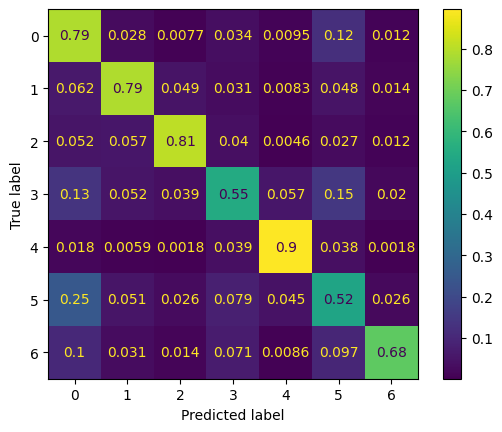

In [2]:
conf_matr = perf['Confusion_matrix']
cm_norm = conf_matr / conf_matr.sum(axis=1, keepdims=True)
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm,
                              display_labels=range(0,7))

disp.plot();

In [6]:
from src.preprocessing import *
from src.config import *
from src.utils import *

news_df = load_data(DEVELOPMENT_PATH)
full_str = news_df.groupby('y')['article'].sum()
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

counts_by_class = {}

for y, text in full_str.items():
    tokens = basic_analyzer(text)
    counts_by_class[y] = Counter(tokens)

top_shared_words(counts_by_class[0], counts_by_class[5], k=15)


[('president', 1093),
 ('iraq', 914),
 ('people', 693),
 ('wednesday', 684),
 ('tuesday', 679),
 ('thursday', 677),
 ('monday', 673),
 ('washington', 662),
 ('bush', 645),
 ('time', 622),
 ('friday', 617),
 ('yeartoken', 602),
 ('year', 592),
 ('width', 567),
 ('height', 562)]

In [7]:
top_shared_words(counts_by_class[0], counts_by_class[3], k=15)


[('yahoo', 2067),
 ('yimg', 2040),
 ('yeartoken', 1878),
 ('news', 1441),
 ('height', 1238),
 ('width', 1237),
 ('left', 1181),
 ('photo', 1128),
 ('clear', 1110),
 ('alt', 1081),
 ('dailynews', 1022),
 ('sig', 1020),
 ('align', 1020),
 ('jpg', 1018),
 ('csmonitor', 927)]

In [8]:
top_shared_words(counts_by_class[5], counts_by_class[3], k=15)


[('people', 693),
 ('tuesday', 622),
 ('yeartoken', 602),
 ('year', 592),
 ('wednesday', 567),
 ('width', 567),
 ('thursday', 565),
 ('height', 562),
 ('monday', 550),
 ('friday', 546),
 ('president', 540),
 ('world', 508),
 ('sunday', 478),
 ('feedburner', 452),
 ('time', 427)]

---

Let's try to be even more aggressive

MORE_NOISE = [
    "yahoo", "yimg", "jpg", "jpeg", "png", "gif",
    "width", "height", "align", "alt",
    "photo", "clear", "left", "right",
    "sig",
    "dailynews", "csmonitor", "feedburner",
    "yeartoken"
]

In [1]:
from src.evaluation import *

perf = performance('linear_svm', {'C': 0.07610872136088885,
  'class_weight': {0: 1.0, 1: 1.0, 2: 1.0, 3: 2.0, 4: 1.0, 5: 2.0, 6: 1.5}})

perf

/home/giovanni/.virtualenvs/news_clf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'Precision_macro': 0.7211181288112859,
 'Recall_macro': 0.7170470680819123,
 'f1-macro': 0.7184198817715377,
 'Per_class': {'f1': array([0.77339322, 0.77945764, 0.8372427 , 0.58105023, 0.86094247,
         0.54049552, 0.65635739])},
 'Confusion_matrix': array([[3616,  127,   39,  154,   41,  525,   44],
        [ 118, 1624,   94,   77,   19,   99,   29],
        [ 115,  124, 1749,   78,   11,   65,   25],
        [ 251,   93,   71, 1018,  112,  277,   36],
        [  38,    8,    2,   77, 1489,   69,    1],
        [ 597,  109,   50,  200,   97, 1298,   68],
        [  70,   22,    6,   42,    6,   51,  382]])}

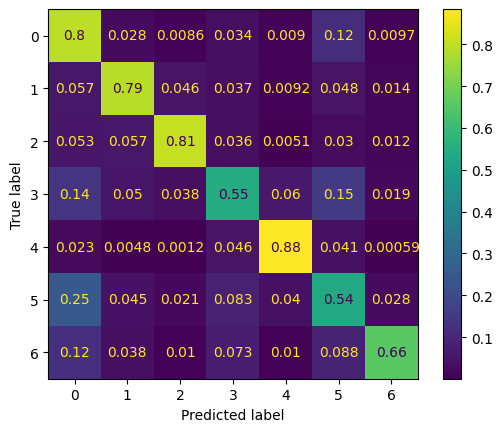

In [2]:
conf_matr = perf['Confusion_matrix']
cm_norm = conf_matr / conf_matr.sum(axis=1, keepdims=True)
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm,
                              display_labels=range(0,7))

disp.plot();

In [5]:
from src.preprocessing import *
from src.config import *
from src.utils import *

news_df = load_data(DEVELOPMENT_PATH)
full_str = news_df.groupby('y')['article'].sum()
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

counts_by_class = {}

for y, text in full_str.items():
    tokens = basic_analyzer(text)
    counts_by_class[y] = Counter(tokens)

top_shared_words(counts_by_class[0], counts_by_class[5], k=15)


[('president', 1092),
 ('iraq', 914),
 ('people', 693),
 ('thursday', 677),
 ('washington', 662),
 ('bush', 644),
 ('time', 622),
 ('yeartoken', 602),
 ('year', 591),
 ('killed', 548),
 ('div', 546),
 ('world', 538),
 ('baghdad', 524),
 ('police', 520),
 ('government', 508)]

In [5]:
def top_shared_words_multi(counters, k=20):
    """
    counters: iterable di Counter (es. [counts_by_class[0], counts_by_class[3], counts_by_class[5]])
    k: top-k parole
    
    Ritorna: [(word, shared_count), ...]
    dove shared_count = min conteggio tra le classi
    """
    # parole presenti in TUTTE le classi
    shared = set.intersection(*(set(c) for c in counters))

    return sorted(
        [(w, min(c[w] for c in counters)) for w in shared],
        key=lambda x: x[1],
        reverse=True
    )[:k]


In [9]:
top_shared_words_multi(
    [counts_by_class[0], counts_by_class[3], counts_by_class[5]],
    k=20
)

[('people', 693),
 ('yeartoken', 602),
 ('year', 591),
 ('thursday', 565),
 ('president', 540),
 ('world', 508),
 ('time', 427),
 ('years', 375),
 ('york', 351),
 ('iraq', 348),
 ('bush', 328),
 ('yesterday', 328),
 ('day', 324),
 ('city', 320),
 ('week', 312),
 ('div', 312),
 ('john', 311),
 ('says', 308),
 ('moneytoken', 307),
 ('police', 294)]

---


EVEN MORE

In [1]:
from src.evaluation import *

perf = performance('linear_svm', {'C': 0.07610872136088885,
  'class_weight': {0: 1.0, 1: 1.0, 2: 1.0, 3: 2.0, 4: 1.0, 5: 2.0, 6: 1.5}})

perf

/home/giovanni/.virtualenvs/news_clf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'Precision_macro': 0.7162307148221476,
 'Recall_macro': 0.7126278594124663,
 'f1-macro': 0.7136992793245917,
 'Per_class': {'f1': array([0.76420668, 0.77743097, 0.83329358, 0.58333333, 0.85386161,
         0.52285419, 0.66091458])},
 'Confusion_matrix': array([[3557,  135,   45,  149,   47,  570,   43],
        [ 123, 1619,   93,   73,   14,  109,   29],
        [ 114,  122, 1747,   81,   12,   67,   24],
        [ 258,   92,   70, 1015,  112,  275,   36],
        [  38,    8,    3,   73, 1487,   73,    1],
        [ 604,  107,   61,  196,  123, 1264,   64],
        [  69,   22,    7,   35,    5,   58,  383]])}

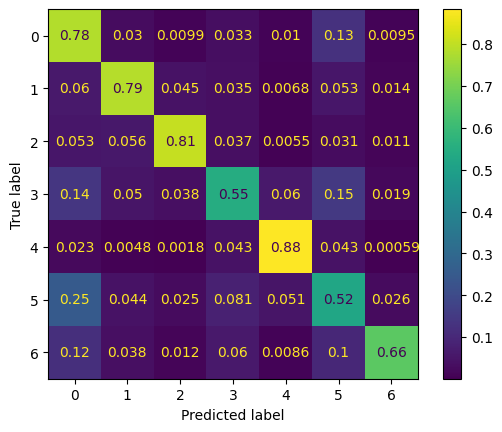

In [2]:
conf_matr = perf['Confusion_matrix']
cm_norm = conf_matr / conf_matr.sum(axis=1, keepdims=True)
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm,
                              display_labels=range(0,7))

disp.plot();

In [4]:
from src.preprocessing import *
from src.config import *
from src.utils import *

news_df = load_data(DEVELOPMENT_PATH)
full_str = news_df.groupby('y')['article'].sum()
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

counts_by_class = {}

for y, text in full_str.items():
    tokens = basic_analyzer(text)
    counts_by_class[y] = Counter(tokens)



In [6]:
top_shared_words_multi(
    [counts_by_class[0], counts_by_class[3], counts_by_class[5]],
    k=20
)

[('yeartoken', 602),
 ('year', 591),
 ('time', 427),
 ('years', 375),
 ('york', 351),
 ('iraq', 348),
 ('yesterday', 328),
 ('bush', 325),
 ('day', 324),
 ('city', 319),
 ('week', 312),
 ('div', 312),
 ('john', 311),
 ('says', 308),
 ('moneytoken', 307),
 ('police', 294),
 ('london', 271),
 ('court', 271),
 ('british', 269),
 ('country', 263)]

In [9]:
title_str = news_df.groupby('y')['title'].sum()
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

counts_by_class_t = {}

for y, text in title_str.items():
    tokens = basic_analyzer(text)
    counts_by_class_t[y] = Counter(tokens)



In [10]:
top_shared_words_multi(
    [counts_by_class_t[0], counts_by_class_t[3], counts_by_class_t[5]],
    k=20
)

[('says', 197),
 ('bush', 111),
 ('iraq', 107),
 ('moneytoken', 103),
 ('wins', 92),
 ('deal', 71),
 ('man', 70),
 ('dies', 65),
 ('set', 61),
 ('takes', 59),
 ('gets', 57),
 ('death', 54),
 ('killed', 53),
 ('iraqi', 49),
 ('hit', 49),
 ('war', 48),
 ('oil', 48),
 ('kills', 48),
 ('lead', 47),
 ('year', 47)]

In [11]:
def jaccard(c1, c2):
    V1, V2 = set(c1), set(c2)
    return len(V1 & V2) / len(V1 | V2)

for i, j in [(0,3), (0,5), (3,5)]:
    print(i, j, jaccard(counts_by_class[i], counts_by_class[j]))


0 3 0.2786124575233298
0 5 0.2842615651648932
3 5 0.33755025462342536


Big overlap between classes; makes no sense to continue to remove similar words

---

The best performance: removed words

    "http", "https", "www", "com",
    "rss", "feed", "feeds",
    "img", "src", "href",

In [1]:
from src.evaluation import *

perf = performance('linear_svm', {'C': 0.07610872136088885,
  'class_weight': {0: 1.0, 1: 1.0, 2: 1.0, 3: 2.0, 4: 1.0, 5: 2.0, 6: 1.5}})

perf

/home/giovanni/.virtualenvs/news_clf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'Precision_macro': 0.7225056742570644,
 'Recall_macro': 0.7222851807649123,
 'f1-macro': 0.7215738678244493,
 'Per_class': {'f1': array([0.77258099, 0.77844026, 0.83567851, 0.59286947, 0.86904078,
         0.53799456, 0.66441251])},
 'Confusion_matrix': array([[3601,  126,   32,  152,   44,  539,   53],
        [ 127, 1632,   97,   65,   17,   94,   28],
        [ 111,  126, 1752,   84,   10,   60,   24],
        [ 250,  100,   73, 1031,  104,  261,   39],
        [  31,   10,    3,   64, 1513,   60,    3],
        [ 596,  121,   62,  186,  105, 1285,   64],
        [  59,   18,    7,   38,    5,   59,  393]])}

---

Now we add also feature len_article and len_title

In [1]:
from src.evaluation import *

perf = performance('linear_svm', {'C': 0.07610872136088885,
  'class_weight': {0: 1.0, 1: 1.0, 2: 1.0, 3: 2.0, 4: 1.0, 5: 2.0, 6: 1.5}})

perf

/home/giovanni/.virtualenvs/news_clf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'Precision_macro': 0.7235066737801512,
 'Recall_macro': 0.7234866389189002,
 'f1-macro': 0.7226223921879037,
 'Per_class': {'f1': array([0.77516382, 0.77980564, 0.83512802, 0.59459459, 0.87198622,
         0.54008792, 0.66159052])},
 'Confusion_matrix': array([[3608,  129,   33,  152,   43,  529,   53],
        [ 122, 1645,   89,   63,   17,   96,   28],
        [ 108,  136, 1745,   84,   10,   59,   25],
        [ 242,   99,   73, 1034,  103,  267,   40],
        [  33,   10,    2,   60, 1519,   57,    3],
        [ 590,  121,   64,  190,  101, 1290,   63],
        [  59,   19,    6,   37,    7,   60,  391]])}

In [1]:
from src.evaluation import *

df1 = produce_submissions('linear_svm',{'C': 0.07610872136088885,
  'class_weight': {0: 1.0, 1: 1.0, 2: 1.0, 3: 2.0, 4: 1.0, 5: 2.0, 6: 1.5}}, 'submission_v15_lsvm.csv')

/home/giovanni/.virtualenvs/news_clf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Prediction saved in submission_v15_lsvm.csv


0.727 => lose 0.001 but I think it's more robust to noise